In [202]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi, asin, acos
from photutils import EllipticalAperture
import math

In [172]:
agalvel=[9289,7116,10339,9384,10850,10581,8564,12146,5338,1572,1687,1359,12721,11604,3003,7480,8263]
bgalvel=[9163,6735,10798,9163,10822,10338,8921,11934,5044,2231,2231,2231,12609,11934,3124,8437,8537]

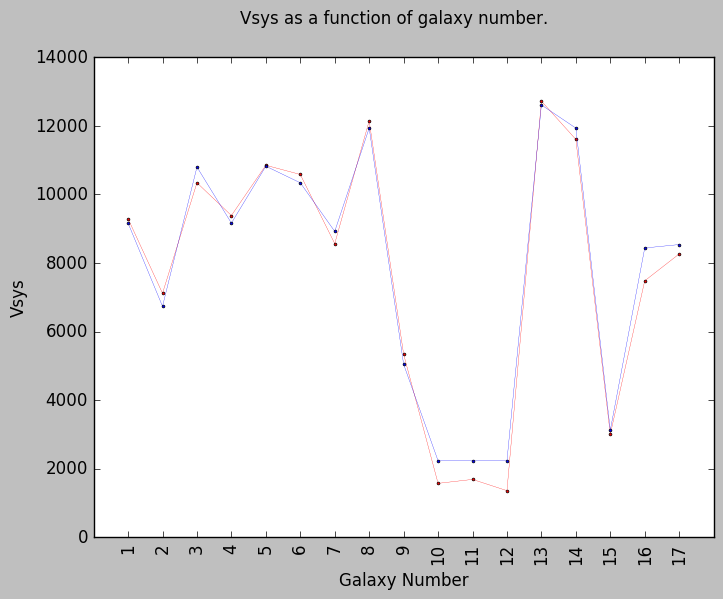

In [173]:
plt.figure(1)
y1 = agalvel
y2 = bgalvel
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Vsys as a function of galaxy number.')
plt.xlabel('Galaxy Number')
plt.ylabel('Vsys')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')

plt.show()

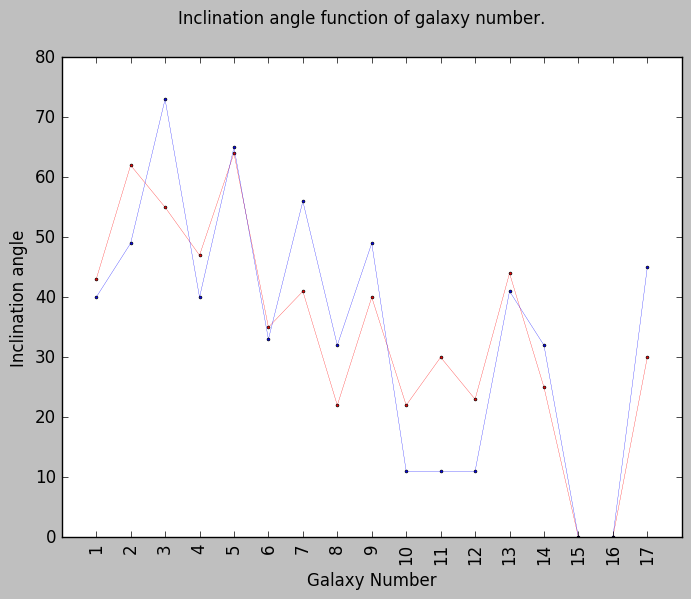

In [174]:
agalinc=[43,62,55,47,64,35,41,22,40,22,30,23,44,25,0,0,30]
bgalinc=[40,49,73,40,65,33,56,32,49,11,11,11,41,32,0,0,45]
plt.figure(2)
y9 = agalinc
y10 = bgalinc
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Inclination angle function of galaxy number.')
plt.xlabel('Galaxy Number')
plt.ylabel('Inclination angle')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')

plt.show()

In [175]:
AFilter1BackgroundLevels=[3.4421115765139492, 3.2547375300774863, 12.858264428342823, 3.1813949765183125, 3.7600268811287498, 4.8918484991014113, 3.9297655480894274, 3.3996288665787966, 5.3896789968816066, 4.0513775794424758, 4.1191245763873248, 4.1177494086036202, 3.5008875706997125, 4.2122783382538866, 3.729716182966285, 2.0556851001526124, 4.1758283845884527]
AFilter2BackgroundLevels=[8.5590945955614899, 8.143267141490508, 14.571620439659508, 7.9111684135521214, 8.3933522079262275, 9.0031530292138005, 8.6521535140804442, 8.5063523819201805, 11.218731769688251, 10.535535334511092, 10.524248529348752, 10.404572888909396, 9.5338444458208293, 9.1579607319065222, 7.7236737132052182, 5.3460908572772139, 9.6811443553818712]
AFilter3BackgroundLevels=[561.75884717404108, 519.51879617096756, 500.40095284519526, 445.87428035648043, 494.14677546669702, 512.26604786592077, 519.74067731811635, 523.88138213581965, 691.28277761291474, 598.82602714941243, 618.82624460276077, 580.31616494725597, 537.23904786980506, 563.74083077368095, 419.13154311167705, 318.04221935321266, 630.68041371614356]
AFilter4BackgroundLevels=[174.96143067909102, 161.01732838660391, 137.08676604529509, 133.465633834041, 151.02031725671523, 161.15860466720639, 163.2707150511028, 164.18320125192921, 234.05396674555899, 192.61924159480481, 200.07223527426214, 186.99575096106912, 173.34363132329759, 169.31825144146669, 120.02023870711452, 100.26893429525373, 202.2995589749809]
BFilter1BackgroundLevels=[14.209956169262346, 3.9610468566431698, 9.2174912157575193, 14.209956169262346, 3.6807403741405809, 5.8453368539262485, 4.8128899174973316, 4.4201488845276016, 5.3024604954781172, 4.4568847162694869, 4.4568847162694869, 4.4568847162694869, 4.3405895652029418, 4.4201488845276016, 5.0416349302156966, 4.216811776526658, 4.7069718975094093]
BFilter2BackgroundLevels=[23.205411132941247, 10.118320299520036, 10.348998448940012, 23.205411132941247, 8.4827323294904904, 17.502664552300068, 10.343921439256308, 10.409912825100436, 9.654632425881827, 10.556270247040617, 10.556270247040617, 10.556270247040617, 17.789751642657571, 10.409912825100436, 9.8022569042358931, 10.1197166433238, 10.386835992667477]
BFilter3BackgroundLevels=[530.92249046613927, 689.51028544070391, 447.13833006361642, 530.92249046613927, 511.61416567318827, 786.44214339453083, 697.03924173412008, 778.12866798486994, 625.96270482373973, 797.91454399663814, 797.91454399663814, 797.91454399663814, 613.80454863914281, 778.12866798486994, 673.88250112569904, 552.75638532184485, 696.09911309544395]
BFilter4BackgroundLevels=[160.31803054981106, 224.84129390460032, 126.10817824242953, 160.31803054981106, 157.13376914408354, 259.99576982680134, 233.1176816711027, 262.49529646064087, 206.40564183221022, 267.41790041342165, 267.41790041342165, 267.41790041342165, 208.65227886270412, 262.49529646064087, 225.94599122339315, 176.96222976701418, 221.33142511629376]


AFilter1FluxPerPixelInLargestAperture=[360542621.65062988, 819954576.13078082, 8522365144.7151394, 853647752.90141046, 865048142.40684175, 1641924342.7593126, 969474387.4510603, 574000772.78335857, 1123341878.787003, 823968774.34693027, 1006539059.0877585, 841266210.59012854, 726680682.57865036, 1563256453.9810877, 228804713.75216025, 230782563.00257623, 624633369.06910765]
AFilter2FluxPerPixelInLargestAperture=[258936505.97395116, 464961811.6833142, 5654851562.5624638, 668166585.46137178, 645140113.0772413, 797799087.15952814, 608522899.56825411, 360710252.28401929, 548397732.48645473, 392818371.25792414, 447610277.34353834, 396566418.92041588, 521961900.49490577, 1159216135.1418107, 97071919.134554341, 603013033.14390326, 413135699.75655335]
AFilter3FluxPerPixelInLargestAperture=[2264984154.0785069, 2617389481.9038939, 8753115144.1464596, 2765115060.6179709, 3400109503.0679536, 2876528785.2344584, 2377760849.8268843, 1892062473.7589262, 1665288606.4066143, 945164835.18395197, 702108973.67235756, 744845271.20962596, 2481201784.8857026, 4030161597.91888, 159790453.49259451, 9372609272.4879608, 2195213415.2299509]
AFilter4FluxPerPixelInLargestAperture=[10740488607.191132, 12428871181.815477, 18186585069.093636, 10889594959.740286, 14820994909.548326, 13698398211.928108, 9774004064.1400261, 8248171767.7823334, 8081180283.2693243, 2992281474.6786923, 2838064541.1241465, 2186140908.9248042, 11782414853.86137, 13964099869.387163, 596931251.53084099, 45992577415.701996, 9265720120.9599953]
BFilter1FluxPerPixelInLargestAperture=[2579161140.4824219, 1170279247.3207641, 3478427138.6376543, 2579161140.4824219, 575380180.25108898, 1148615951.5923505, 866228917.40437603, 507909377.77894092, 1736700212.2934093, 751555580.10821354, 751555580.10821354, 751555580.10821354, 216900185.75025988, 507909377.77894092, 939424161.42389464, 905843071.60527265, 75222005.666648656]
BFilter2FluxPerPixelInLargestAperture=[1739070732.748024, 732344986.45907915, 1888958599.196579, 1739070732.748024, 398743634.43370634, 732757670.57173777, 505044820.68426305, 345015413.04495019, 795019779.31056559, 332769404.06612575, 332769404.06612575, 332769404.06612575, 899765712.11008286, 345015413.04495019, 414444308.57248563, 424930648.6408, 48379685.090874836]
BFilter3FluxPerPixelInLargestAperture=[7124555544.1369505, 4327885351.3428621, 7246327652.5050049, 7124555544.1369505, 3165391789.7852688, 3862003177.4876399, 3450263470.2668624, 2934903063.9900832, 1933032562.5079658, 638140363.98198068, 638140363.98198068, 638140363.98198068, 7964736391.5379286, 2934903063.9900832, 1212925172.1572719, 983806270.66174078, 309265855.55950379]
BFilter4FluxPerPixelInLargestAperture=[33548942425.256378, 14916162415.213196, 21009881881.725346, 33548942425.256378, 14862525045.553135, 19708170357.71212, 17595743309.426456, 14468744211.818426, 9616729076.9194756, 2180116978.3738585, 2180116978.3738585, 2180116978.3738585, 42193127036.472588, 14468744211.818426, 6146437314.5509567, 4689527957.0541992, 1523466197.0909739]


band=[1,2,3,4]

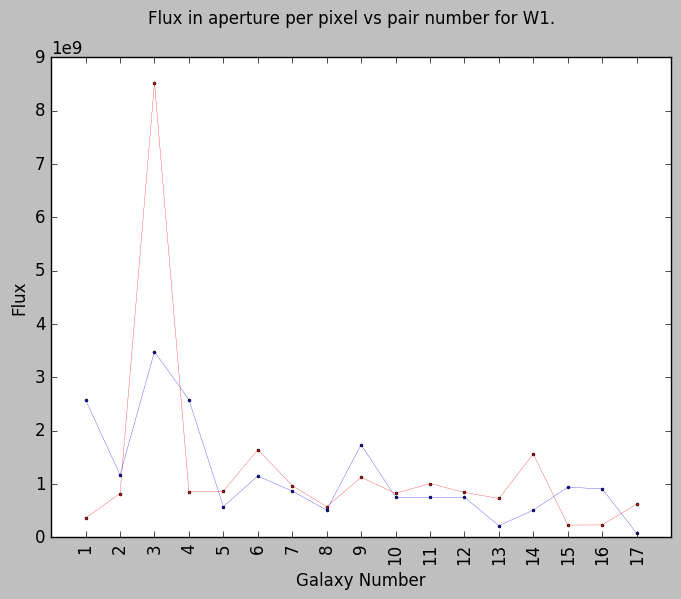

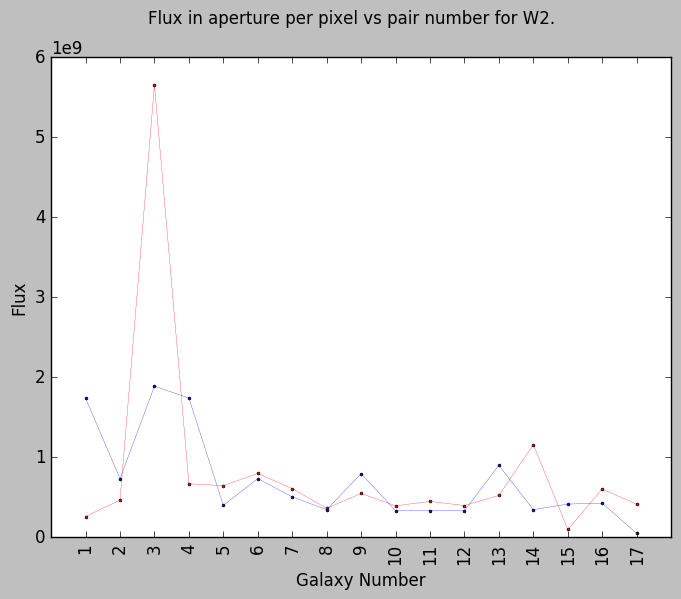

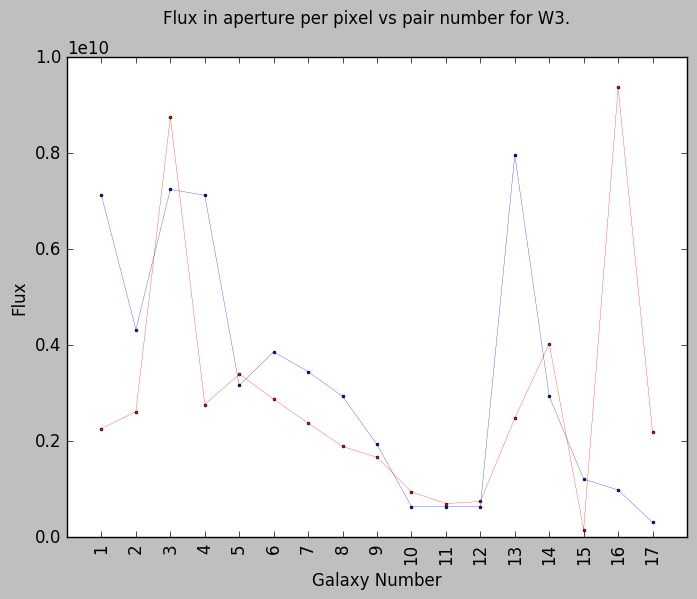

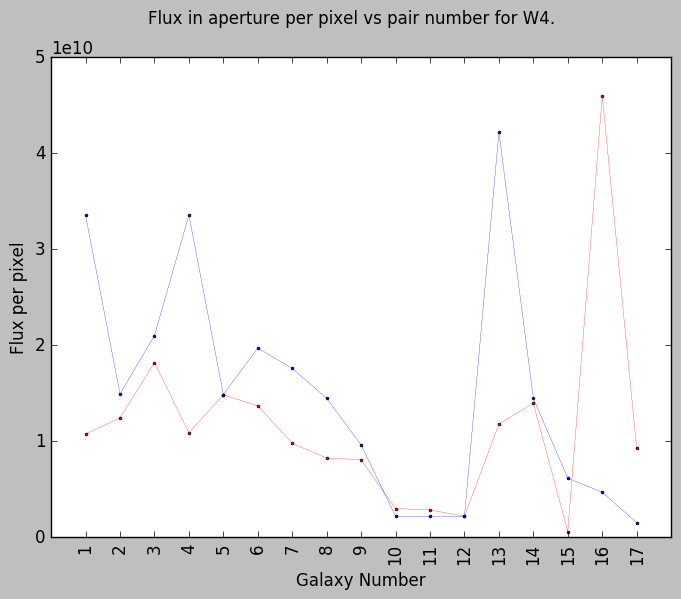

In [176]:
plt.figure(3)
y1 = AFilter1FluxPerPixelInLargestAperture
y2 = BFilter1FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W1.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(4)
y3 = AFilter2FluxPerPixelInLargestAperture
y4 = BFilter2FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y3, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W2.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(5)
y5 = AFilter3FluxPerPixelInLargestAperture
y6 = BFilter3FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y5, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W3.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(6)
y7 = AFilter4FluxPerPixelInLargestAperture
y8 = BFilter4FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y7, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y8, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W4.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux per pixel')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

In [234]:
W1AEffRad=[3.6252419006,3.2133091483,2.6086645165,3.3560588457,2.7303474903,3.2960720229,4.2234392722,4.5806450703,5.5290977575,12.1021861401,15.2482492416,16.4233741583,3.4476394112,3.6937362471,0,0,5.0953235732]
W1BEffRad=[1.7861602129,3.3345558839,1.8605793747,1.7861602129,2.923024928,3.9860044712,3.6890936654,4.6564162921,4.6322059211,24.7624286222,24.7624286222,24.7624286222,2.0811440636,4.6564162921,6.4408835071,6.6858539555,0]
W2AEffRad=[5.188315103,4.0224765977,2.7357352329,3.879215433,3.2352356356,3.7867464782,4.6604714271,5.5928401287,6.4625390152,13.2862784436,16.3334103016,18.0188301365,4.1637783498,4.0482472415,0,0,5.7659778709]
W2BEffRad=[2.0024404966,3.9700790249,1.9935217645,2.0024404966,3.7992608191,4.9582206671,4.5447655397,6.0469123813,5.2531362231,26.191468927,26.191468927,26.191468927,2.088761945,6.0469123813,7.4071682969,7.8000799316,0]
W3AEffRad=[7.6563541828,6.3215449361,3.4283262531,5.9555230959,4.7461777977,5.5968338696,7.6834739714,9.4387756501,14.1790388729,24.7604416212,34.7359703115,31.6010647005,6.8912311145,5.7506430588,0,0,10.1770258352]
W3BEffRad=[2.1090636477,6.4186219379,2.4761031238,2.1090636477,4.9064401469,6.3479372599,6.2963986401,8.9426650128,10.4485301421,51.0170288094,51.0170288094,51.0170288094,2.0925567523,8.9426650128,18.3606512546,18.6500485518,0]
W4AEffRad=[7.7308204466,6.3596913487,4.0341902117,6.3166809971,4.9023789945,5.6464940748,8.2926634675,9.8578836598,14.7763803029,35.0108563728,39.0834766487,45.0092163342,7.0408372969,6.3098741024,0,0,11.0974851143]
W4BEffRad=[2.1084066611,7.576233649,2.7598475667,2.1084066611,4.9378077488,6.3653912786,6.3350280715,9.1699995566,10.5947688667,66.5612529809,66.5612529809,66.5612529809,2.0921475602,9.1699995566,18.3988263993,19.0084276873,0]

W1AEffRadPolInt=[3.603130, 3.196330, 2.598330, 3.336640, 2.714140, 3.279750, 4.219120, 4.560450, 5.510170, 12.096530, 15.246020, 16.443100, 3.425860, 3.685140, 0, 0, 5.089370]
W1BEffRadPolInt=[1.837310, 3.313470, 1.861660, 1.837310, 2.918910, 3.985620, 3.675350, 4.641970, 4.614700, 24.781330, 24.781330, 24.781330, 2.086900, 4.641970, 6.419270, 6.66730, 0]
W2AEffRadPolInt=[5.177960, 4.020520, 2.731370, 3.873770, 3.218250, 3.779020, 4.661510, 5.582410, 6.441800, 13.281660, 16.332480, 18.037200, 4.150620, 4.045180, 0, 0, 5.748830]
W2BEffRadPolInt=[2.002420, 3.968240, 1.993710, 2.002420, 3.795300, 4.958420, 4.535580, 6.044600, 5.238010, 26.207750, 26.207750, 26.207750, 2.096060, 6.044700, 7.388870, 7.790340, 0]
W3AEffRadPolInt=[7.666140, 6.339510, 3.426180, 5.956760, 4.762840, 5.624020, 7.673450, 9.413540, 14.187300, 24.798060, 34.729770, 31.596380, 6.899690, 5.752740, 0, 0, 10.174470]
W3BEffRadPolInt=[2.124750, 6.418580, 2.495020, 2.124750, 4.914820, 6.351630, 6.318590, 8.942860, 10.458750, 51.007520, 51.007520, 51.007520, 2.100680, 8.942860, 18.343810, 18.641320, 0]
W4AEffRadPolInt=[7.739100, 6.379080, 4.036440, 6.339400, 4.911280, 5.673310, 8.300120, 9.857460, 14.785440, 35.079340, 39.112860, 45.053420, 7.042030, 6.346290, 0, 0, 11.100880]
W4BEffRadPolInt=[2.123870, 7.576230, 2.798070, 2.123870, 4.943770, 6.369420, 6.359310, 9.178440, 10.607510, 66.537570, 66.537570, 66.537570, 2.100180, 9.178440, 18.383870, 19.016600, 0]

agalinc=[43,62,55,47,64,35,41,22,40,22,30,23,44,25,0,0,30]
bgalinc=[40,49,73,40,65,33,56,32,49,11,11,11,41,32,0,0,45]
factorA=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
factorB=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
agalradinc=[]
bgalradinc=[]

for i in range(0,17):
    agalradinc.append(agalinc[i]*np.pi/180)
    i=i+1
for i in range(0,17):
    bgalradinc.append(bgalinc[i]*np.pi/180)
    i=i+1
        
for i in range(0,17):
    a=agalradinc[i]
    b=math.cos(a)
    factorA[i]=round(b,6)
    c=bgalradinc[i]
    d=math.cos(c)
    factorB[i]=round(d,6)
    i=i+1
print(factorA)
print(factorB)

W1AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W1BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,17):
    W1AMajEffRadPolInt[i]=W1AEffRadPolInt[i]/factorA[i]
    W1BMajEffRadPolInt[i]=W1BEffRadPolInt[i]/factorB[i]
    W2AMajEffRadPolInt[i]=W2AEffRadPolInt[i]/factorA[i]
    W2BMajEffRadPolInt[i]=W2BEffRadPolInt[i]/factorB[i]
    W3AMajEffRadPolInt[i]=W3AEffRadPolInt[i]/factorA[i]
    W3BMajEffRadPolInt[i]=W3BEffRadPolInt[i]/factorB[i]
    W4AMajEffRadPolInt[i]=W4AEffRadPolInt[i]/factorA[i]
    W4BMajEffRadPolInt[i]=W4BEffRadPolInt[i]/factorB[i]
    i=i+1
print(W1AMajEffRadPolInt)

IntDifference1A=[]
IntDifference1B=[]
IntDifference2A=[]
IntDifference2B=[]
IntDifference3A=[]
IntDifference3B=[]
IntDifference4A=[]
IntDifference4B=[]
for i in range(0,17):
    IntDifference1A.append(round(((W1AEffRad[i])-(W1AEffRadPolInt[i])),6))
    IntDifference1B.append(round(((W1BEffRad[i])-(W1BEffRadPolInt[i])),6))
    IntDifference2A.append(round(((W2AEffRad[i])-(W2AEffRadPolInt[i])),6))
    IntDifference2B.append(round(((W2BEffRad[i])-(W2BEffRadPolInt[i])),6))
    IntDifference3A.append(round(((W3AEffRad[i])-(W3AEffRadPolInt[i])),6))
    IntDifference3B.append(round(((W3BEffRad[i])-(W3BEffRadPolInt[i])),6))
    IntDifference4A.append(round(((W4AEffRad[i])-(W4AEffRadPolInt[i])),6))
    IntDifference4B.append(round(((W4BEffRad[i])-(W4BEffRadPolInt[i])),6))
    i=i+1

[0.731354, 0.469472, 0.573576, 0.681998, 0.438371, 0.819152, 0.75471, 0.927184, 0.766044, 0.927184, 0.866025, 0.920505, 0.71934, 0.906308, 1.0, 1.0, 0.866025]
[0.766044, 0.656059, 0.292372, 0.766044, 0.422618, 0.838671, 0.559193, 0.848048, 0.656059, 0.981627, 0.981627, 0.981627, 0.75471, 0.848048, 1.0, 1.0, 0.707107]
[4.926656584909634, 6.808350657760207, 4.530053558726307, 4.892448364951217, 6.191422334050382, 4.003835673965272, 5.590385711067828, 4.918602995737632, 7.193020244267953, 13.046525824431827, 17.604595710285498, 17.863129477840967, 4.7625045180304175, 4.066101148836819, 0.0, 0.0, 5.8767010190237]


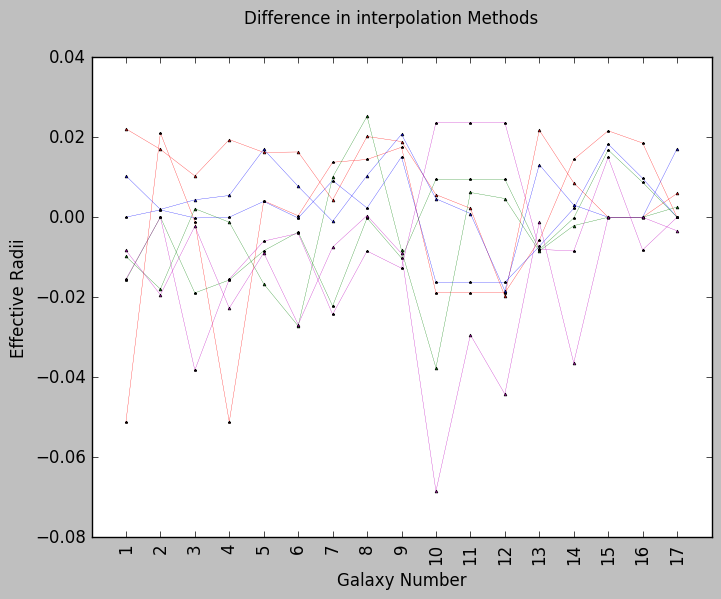

In [189]:
#Differences in interpolation methods
plt.figure(1)
y1 = IntDifference1A
y2 = IntDifference1B
y3 = IntDifference2A
y4 = IntDifference2B
y5 = IntDifference3A
y6 = IntDifference3B
y7 = IntDifference4A
y8 = IntDifference4B

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'r^-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'r*-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'b^-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'b*-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'g^-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'g*-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'm^-', linewidth=0.2, ms=2)
line = plt.plot(x, y8, 'm*-', linewidth=0.2, ms=2)
plt.suptitle('Difference in interpolation Methods')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

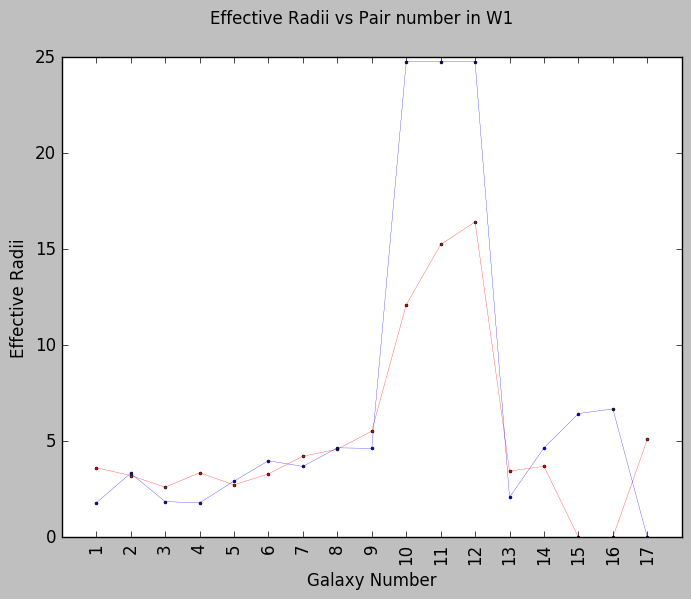

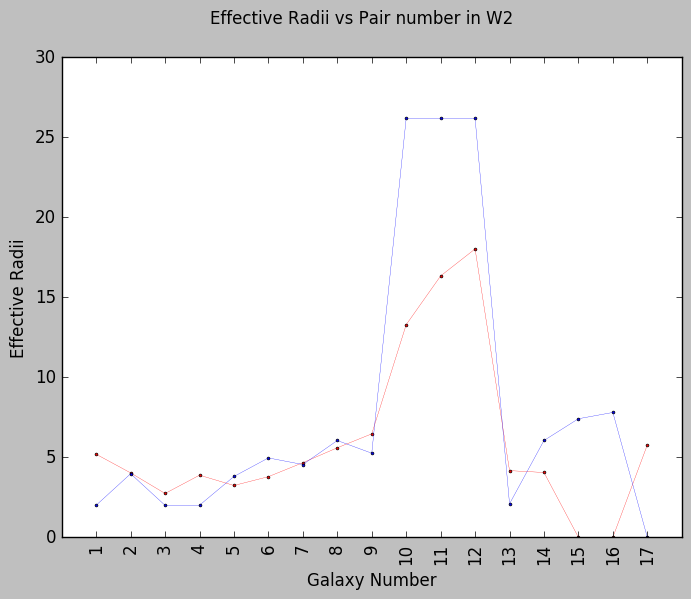

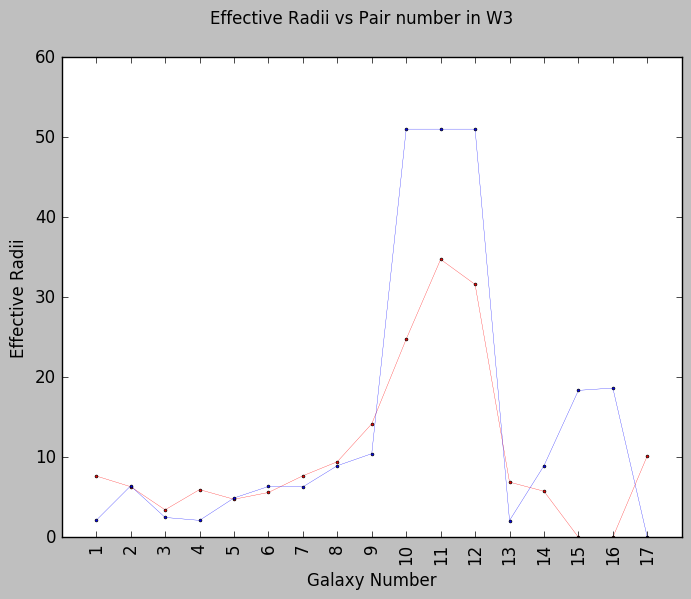

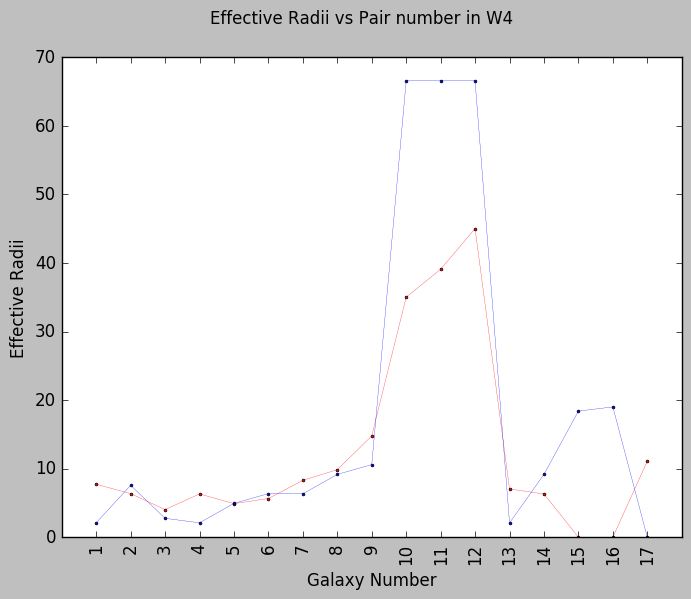

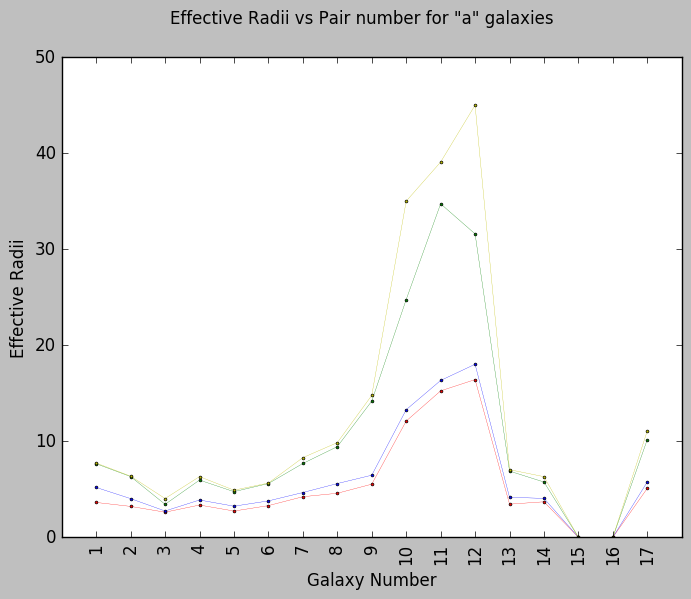

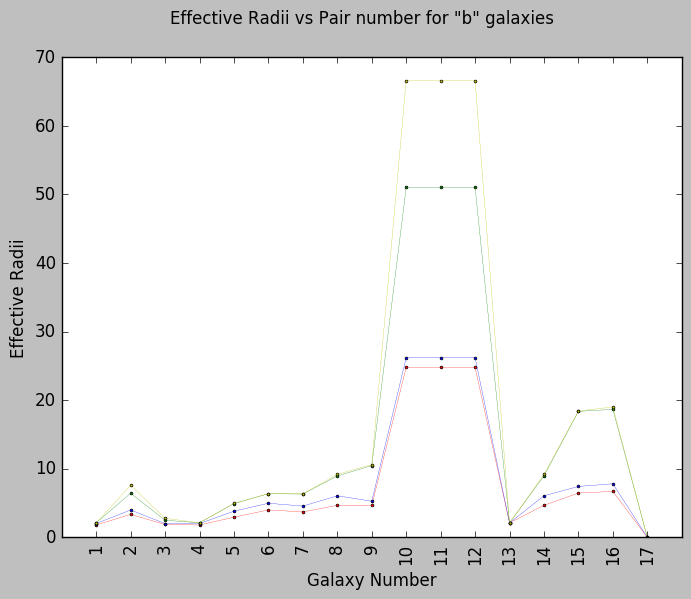

In [178]:
#Linearly interpolated effective radii

plt.figure(7)
y9 = W1AEffRad
y10 = W1BEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AEffRad
y10 = W2BEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AEffRad
y10 = W3BEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AEffRad
y10 = W4BEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1AEffRad
y2 = W2AEffRad
y3 = W3AEffRad
y4 = W4AEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)

plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1BEffRad
y2 = W2BEffRad
y3 = W3BEffRad
y4 = W4BEffRad

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


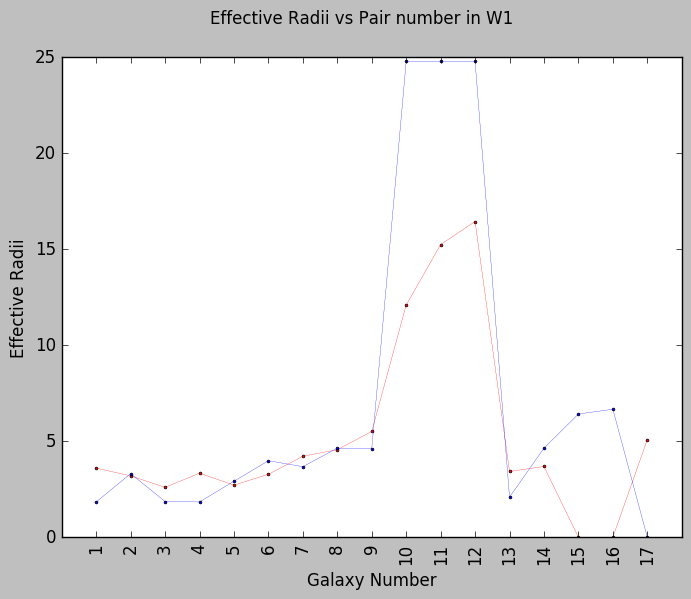

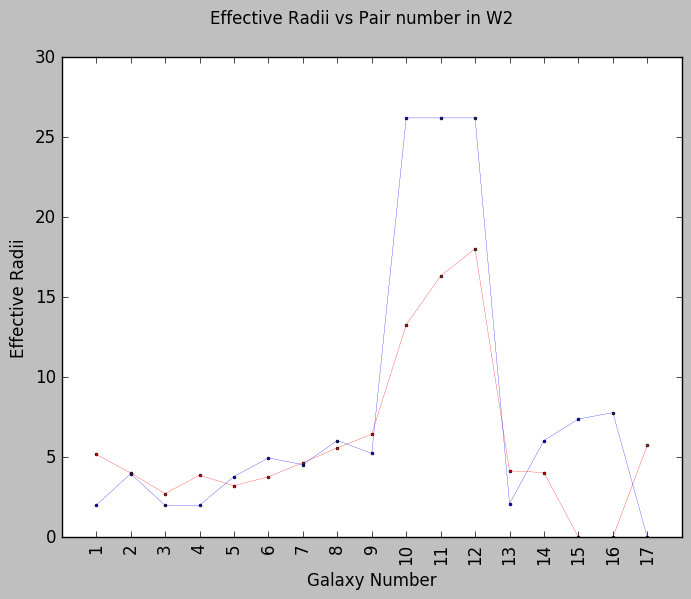

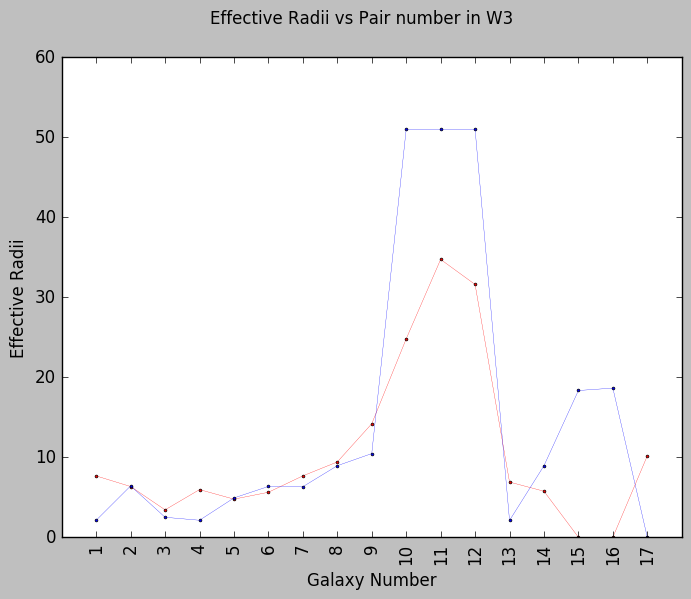

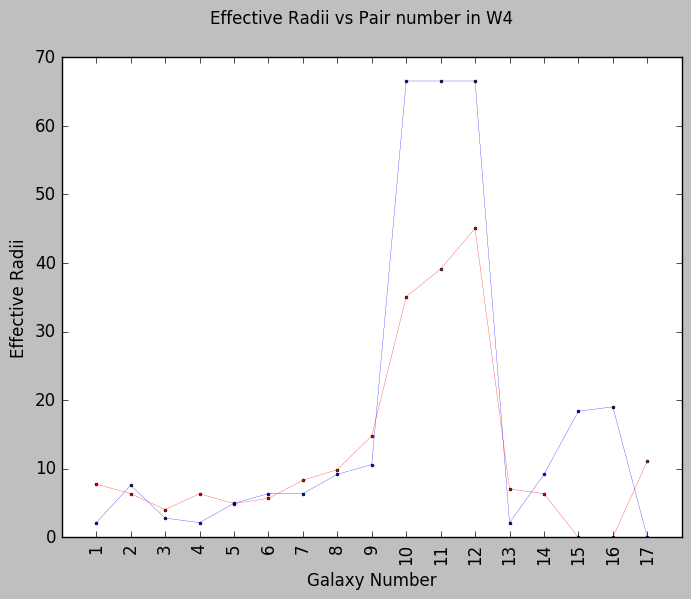

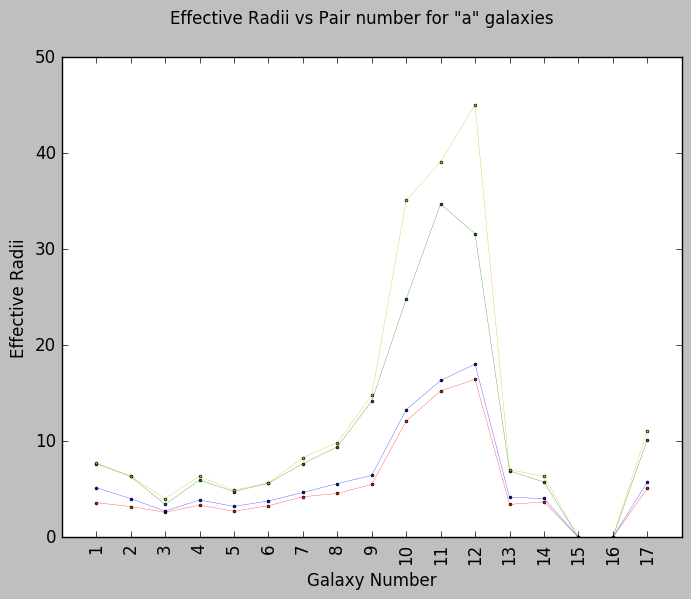

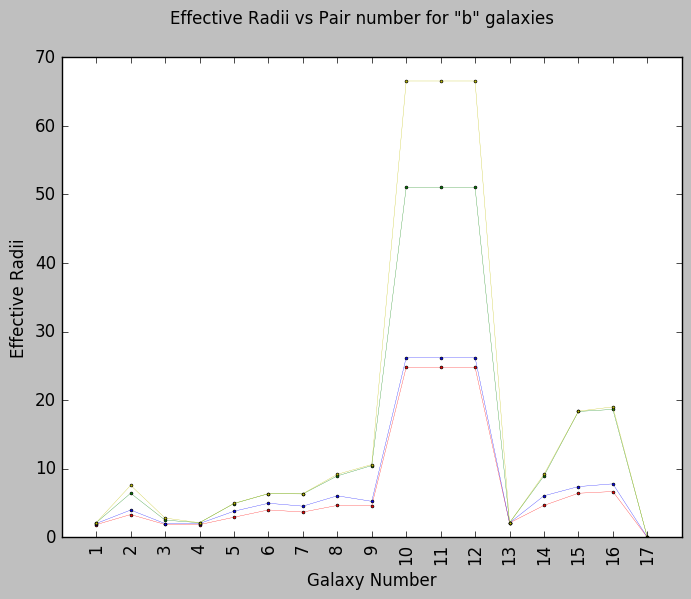

In [179]:
#Polynomially Interpolated effective radii

plt.figure(7)
y9 = W1AEffRadPolInt
y10 = W1BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AEffRadPolInt
y10 = W2BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AEffRadPolInt
y10 = W3BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AEffRadPolInt
y10 = W4BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1AEffRadPolInt
y2 = W2AEffRadPolInt
y3 = W3AEffRadPolInt
y4 = W4AEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)

plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1BEffRadPolInt
y2 = W2BEffRadPolInt
y3 = W3BEffRadPolInt
y4 = W4BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

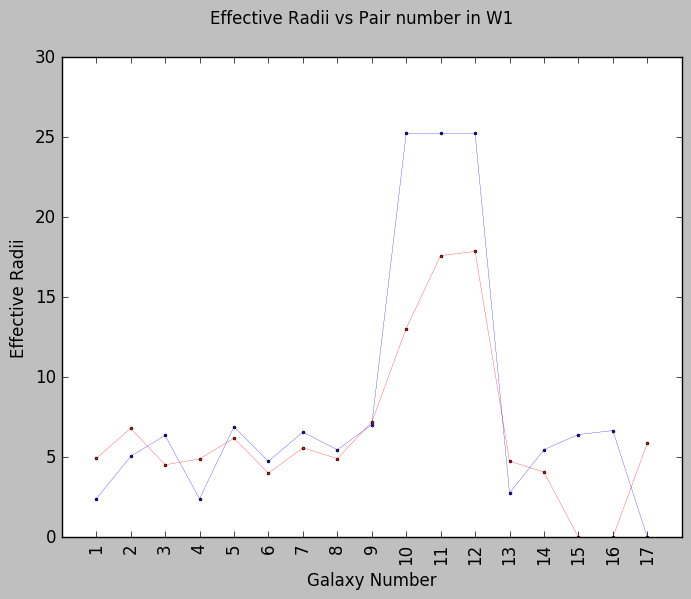

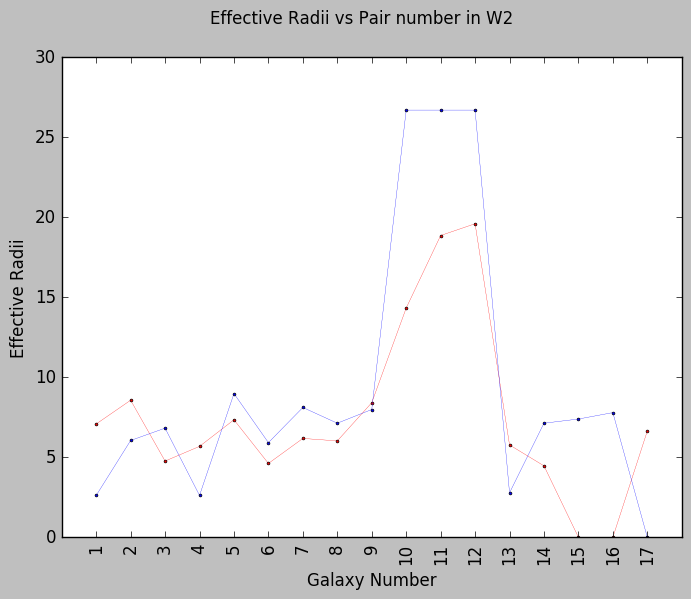

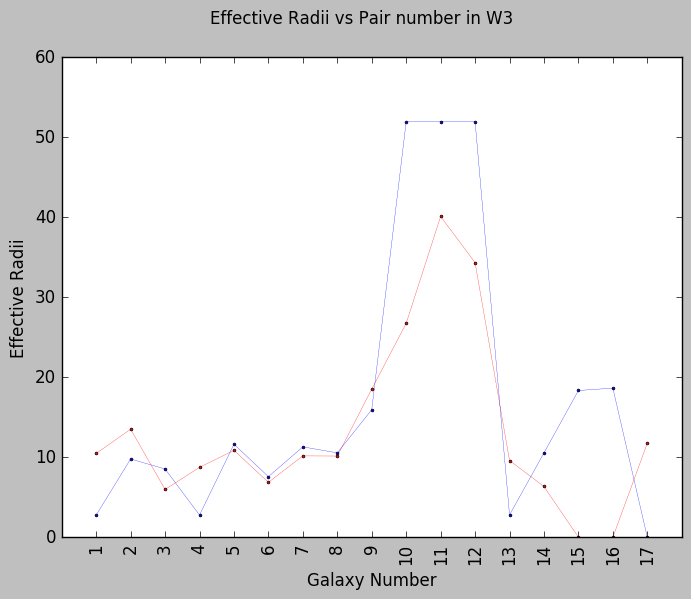

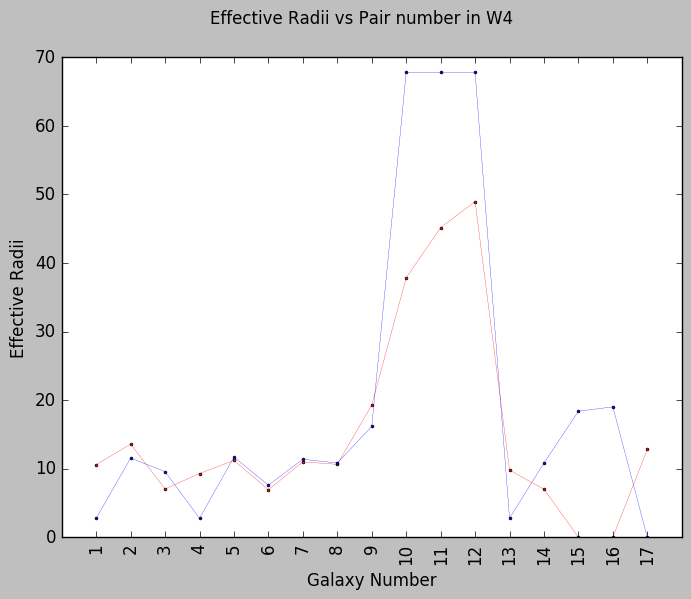

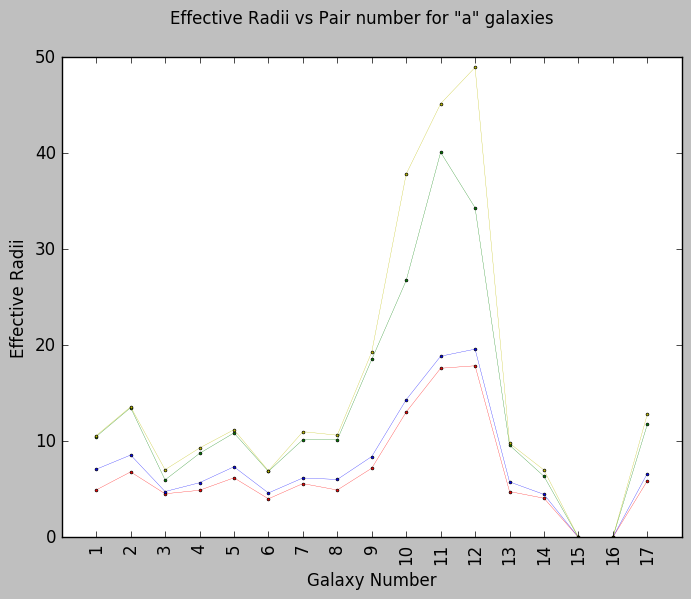

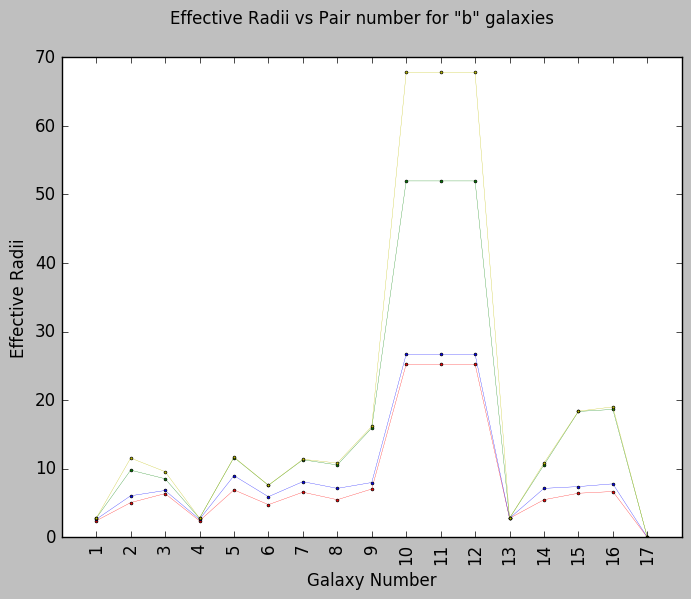

In [237]:
#Polynomially Interpolated effective radii

plt.figure(7)
y9 = W1AMajEffRadPolInt
y10 = W1BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AMajEffRadPolInt
y10 = W2BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AMajEffRadPolInt
y10 = W3BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AMajEffRadPolInt
y10 = W4BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1AMajEffRadPolInt
y2 = W2AMajEffRadPolInt
y3 = W3AMajEffRadPolInt
y4 = W4AMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)

plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y1 = W1BMajEffRadPolInt
y2 = W2BMajEffRadPolInt
y3 = W3BMajEffRadPolInt
y4 = W4BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

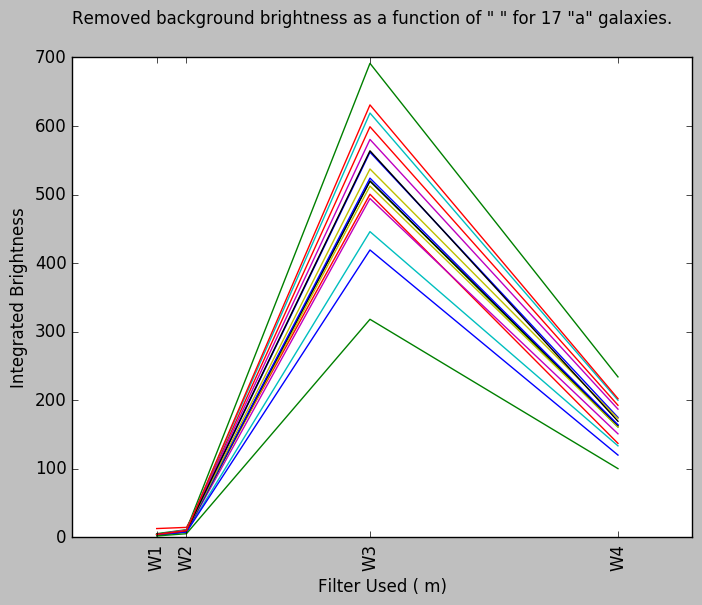

In [146]:
#A Background levels
x= [3.4,4.6,12,22]

Gal1points=[AFilter1BackgroundLevels[0],AFilter2BackgroundLevels[0],AFilter3BackgroundLevels[0],AFilter4BackgroundLevels[0]]
Gal2points=[AFilter1BackgroundLevels[1],AFilter2BackgroundLevels[1],AFilter3BackgroundLevels[1],AFilter4BackgroundLevels[1]]
Gal3points=[AFilter1BackgroundLevels[2],AFilter2BackgroundLevels[2],AFilter3BackgroundLevels[2],AFilter4BackgroundLevels[2]]
Gal4points=[AFilter1BackgroundLevels[3],AFilter2BackgroundLevels[3],AFilter3BackgroundLevels[3],AFilter4BackgroundLevels[3]]
Gal5points=[AFilter1BackgroundLevels[4],AFilter2BackgroundLevels[4],AFilter3BackgroundLevels[4],AFilter4BackgroundLevels[4]]
Gal6points=[AFilter1BackgroundLevels[5],AFilter2BackgroundLevels[5],AFilter3BackgroundLevels[5],AFilter4BackgroundLevels[5]]
Gal7points=[AFilter1BackgroundLevels[6],AFilter2BackgroundLevels[6],AFilter3BackgroundLevels[6],AFilter4BackgroundLevels[6]]
Gal8points=[AFilter1BackgroundLevels[7],AFilter2BackgroundLevels[7],AFilter3BackgroundLevels[7],AFilter4BackgroundLevels[7]]
Gal9points=[AFilter1BackgroundLevels[8],AFilter2BackgroundLevels[8],AFilter3BackgroundLevels[8],AFilter4BackgroundLevels[8]]
Gal10points=[AFilter1BackgroundLevels[9],AFilter2BackgroundLevels[9],AFilter3BackgroundLevels[9],AFilter4BackgroundLevels[9]]
Gal11points=[AFilter1BackgroundLevels[10],AFilter2BackgroundLevels[10],AFilter3BackgroundLevels[10],AFilter4BackgroundLevels[10]]
Gal12points=[AFilter1BackgroundLevels[11],AFilter2BackgroundLevels[11],AFilter3BackgroundLevels[11],AFilter4BackgroundLevels[11]]
Gal13points=[AFilter1BackgroundLevels[12],AFilter2BackgroundLevels[12],AFilter3BackgroundLevels[12],AFilter4BackgroundLevels[12]]
Gal14points=[AFilter1BackgroundLevels[13],AFilter2BackgroundLevels[13],AFilter3BackgroundLevels[13],AFilter4BackgroundLevels[13]]
Gal15points=[AFilter1BackgroundLevels[14],AFilter2BackgroundLevels[14],AFilter3BackgroundLevels[14],AFilter4BackgroundLevels[14]]
Gal16points=[AFilter1BackgroundLevels[15],AFilter2BackgroundLevels[15],AFilter3BackgroundLevels[15],AFilter4BackgroundLevels[15]]
Gal17points=[AFilter1BackgroundLevels[16],AFilter2BackgroundLevels[16],AFilter3BackgroundLevels[16],AFilter4BackgroundLevels[16]]



plt.figure(11)
y1 = Gal1points
y2 = Gal2points
y3 = Gal3points
y4 = Gal4points
y5 = Gal5points
y6 = Gal6points
y7 = Gal7points
y8 = Gal8points
y9 = Gal9points
y10 = Gal10points
y11 = Gal11points
y12 = Gal12points
y13 = Gal13points
y14 = Gal14points
y15 = Gal15points
y16 = Gal16points
y17 = Gal17points
x = [3.4, 4.6, 12, 22]

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)

plt.suptitle('Removed background brightness as a function of " " for 17 "a" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()

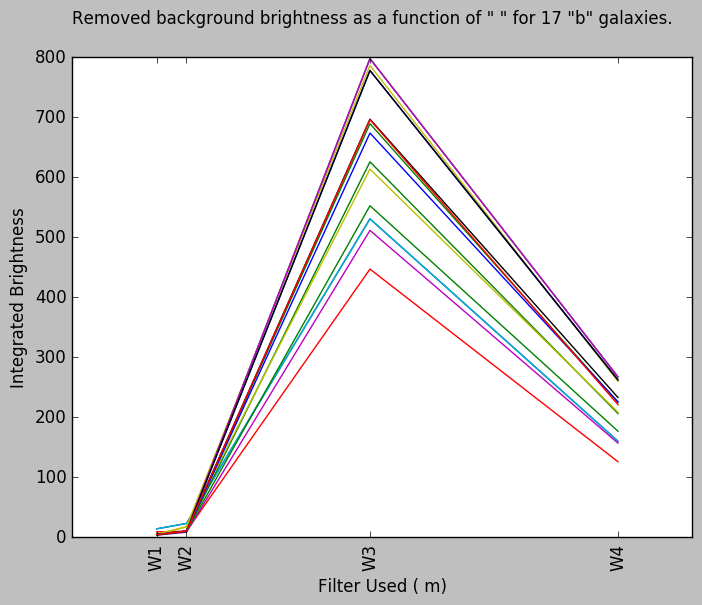

In [147]:
#B Background levels
x= [3.4,4.6,12,22]

Gal1points=[BFilter1BackgroundLevels[0],BFilter2BackgroundLevels[0],BFilter3BackgroundLevels[0],BFilter4BackgroundLevels[0]]
Gal2points=[BFilter1BackgroundLevels[1],BFilter2BackgroundLevels[1],BFilter3BackgroundLevels[1],BFilter4BackgroundLevels[1]]
Gal3points=[BFilter1BackgroundLevels[2],BFilter2BackgroundLevels[2],BFilter3BackgroundLevels[2],BFilter4BackgroundLevels[2]]
Gal4points=[BFilter1BackgroundLevels[3],BFilter2BackgroundLevels[3],BFilter3BackgroundLevels[3],BFilter4BackgroundLevels[3]]
Gal5points=[BFilter1BackgroundLevels[4],BFilter2BackgroundLevels[4],BFilter3BackgroundLevels[4],BFilter4BackgroundLevels[4]]
Gal6points=[BFilter1BackgroundLevels[5],BFilter2BackgroundLevels[5],BFilter3BackgroundLevels[5],BFilter4BackgroundLevels[5]]
Gal7points=[BFilter1BackgroundLevels[6],BFilter2BackgroundLevels[6],BFilter3BackgroundLevels[6],BFilter4BackgroundLevels[6]]
Gal8points=[BFilter1BackgroundLevels[7],BFilter2BackgroundLevels[7],BFilter3BackgroundLevels[7],BFilter4BackgroundLevels[7]]
Gal9points=[BFilter1BackgroundLevels[8],BFilter2BackgroundLevels[8],BFilter3BackgroundLevels[8],BFilter4BackgroundLevels[8]]
Gal10points=[BFilter1BackgroundLevels[9],BFilter2BackgroundLevels[9],BFilter3BackgroundLevels[9],BFilter4BackgroundLevels[9]]
Gal11points=[BFilter1BackgroundLevels[10],BFilter2BackgroundLevels[10],BFilter3BackgroundLevels[10],BFilter4BackgroundLevels[10]]
Gal12points=[BFilter1BackgroundLevels[11],BFilter2BackgroundLevels[11],BFilter3BackgroundLevels[11],BFilter4BackgroundLevels[11]]
Gal13points=[BFilter1BackgroundLevels[12],BFilter2BackgroundLevels[12],BFilter3BackgroundLevels[12],BFilter4BackgroundLevels[12]]
Gal14points=[BFilter1BackgroundLevels[13],BFilter2BackgroundLevels[13],BFilter3BackgroundLevels[13],BFilter4BackgroundLevels[13]]
Gal15points=[BFilter1BackgroundLevels[14],BFilter2BackgroundLevels[14],BFilter3BackgroundLevels[14],BFilter4BackgroundLevels[14]]
Gal16points=[BFilter1BackgroundLevels[15],BFilter2BackgroundLevels[15],BFilter3BackgroundLevels[15],BFilter4BackgroundLevels[15]]
Gal17points=[BFilter1BackgroundLevels[16],BFilter2BackgroundLevels[16],BFilter3BackgroundLevels[16],BFilter4BackgroundLevels[16]]



plt.figure(12)
y1 = Gal1points
y2 = Gal2points
y3 = Gal3points
y4 = Gal4points
y5 = Gal5points
y6 = Gal6points
y7 = Gal7points
y8 = Gal8points
y9 = Gal9points
y10 = Gal10points
y11 = Gal11points
y12 = Gal12points
y13 = Gal13points
y14 = Gal14points
y15 = Gal15points
y16 = Gal16points
y17 = Gal17points
x = [3.4, 4.6, 12, 22]

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)

plt.suptitle('Removed background brightness as a function of " " for 17 "b" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()

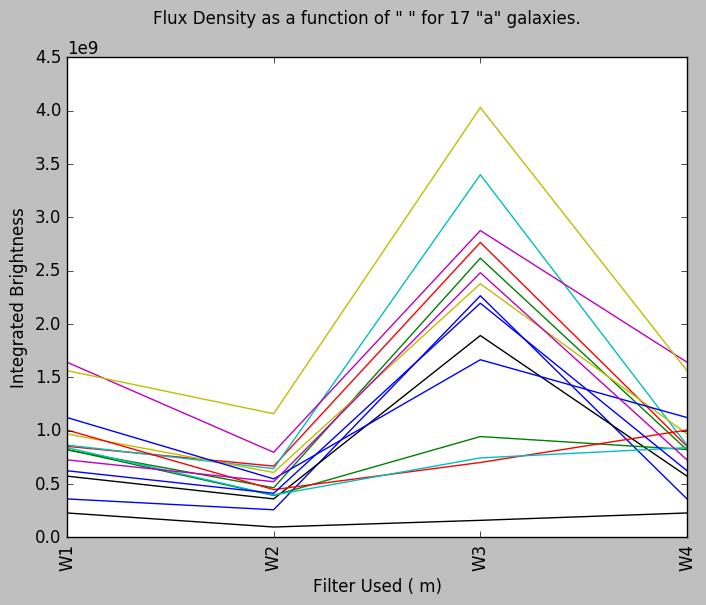

In [191]:
#A galaxies

#x= [3.4,4.6,12,22]
x=[1,2,3,4]

GalA1points=[AFilter1FluxPerPixelInLargestAperture[0],AFilter2FluxPerPixelInLargestAperture[0],AFilter3FluxPerPixelInLargestAperture[0],AFilter1FluxPerPixelInLargestAperture[0]]
GalA2points=[AFilter1FluxPerPixelInLargestAperture[1],AFilter2FluxPerPixelInLargestAperture[1],AFilter3FluxPerPixelInLargestAperture[1],AFilter1FluxPerPixelInLargestAperture[1]]
GalA3points=[AFilter1FluxPerPixelInLargestAperture[2],AFilter2FluxPerPixelInLargestAperture[2],AFilter3FluxPerPixelInLargestAperture[2],AFilter1FluxPerPixelInLargestAperture[2]]
GalA4points=[AFilter1FluxPerPixelInLargestAperture[3],AFilter2FluxPerPixelInLargestAperture[3],AFilter3FluxPerPixelInLargestAperture[3],AFilter1FluxPerPixelInLargestAperture[3]]
GalA5points=[AFilter1FluxPerPixelInLargestAperture[4],AFilter2FluxPerPixelInLargestAperture[4],AFilter3FluxPerPixelInLargestAperture[4],AFilter1FluxPerPixelInLargestAperture[4]]
GalA6points=[AFilter1FluxPerPixelInLargestAperture[5],AFilter2FluxPerPixelInLargestAperture[5],AFilter3FluxPerPixelInLargestAperture[5],AFilter1FluxPerPixelInLargestAperture[5]]
GalA7points=[AFilter1FluxPerPixelInLargestAperture[6],AFilter2FluxPerPixelInLargestAperture[6],AFilter3FluxPerPixelInLargestAperture[6],AFilter1FluxPerPixelInLargestAperture[6]]
GalA8points=[AFilter1FluxPerPixelInLargestAperture[7],AFilter2FluxPerPixelInLargestAperture[7],AFilter3FluxPerPixelInLargestAperture[7],AFilter1FluxPerPixelInLargestAperture[7]]
GalA9points=[AFilter1FluxPerPixelInLargestAperture[8],AFilter2FluxPerPixelInLargestAperture[8],AFilter3FluxPerPixelInLargestAperture[8],AFilter1FluxPerPixelInLargestAperture[8]]
GalA10points=[AFilter1FluxPerPixelInLargestAperture[9],AFilter2FluxPerPixelInLargestAperture[9],AFilter3FluxPerPixelInLargestAperture[9],AFilter1FluxPerPixelInLargestAperture[9]]
GalA11points=[AFilter1FluxPerPixelInLargestAperture[10],AFilter2FluxPerPixelInLargestAperture[10],AFilter3FluxPerPixelInLargestAperture[10],AFilter1FluxPerPixelInLargestAperture[10]]
GalA12points=[AFilter1FluxPerPixelInLargestAperture[11],AFilter2FluxPerPixelInLargestAperture[11],AFilter3FluxPerPixelInLargestAperture[11],AFilter1FluxPerPixelInLargestAperture[11]]
GalA13points=[AFilter1FluxPerPixelInLargestAperture[12],AFilter2FluxPerPixelInLargestAperture[12],AFilter3FluxPerPixelInLargestAperture[12],AFilter1FluxPerPixelInLargestAperture[12]]
GalA14points=[AFilter1FluxPerPixelInLargestAperture[13],AFilter2FluxPerPixelInLargestAperture[13],AFilter3FluxPerPixelInLargestAperture[13],AFilter1FluxPerPixelInLargestAperture[13]]
GalA15points=[AFilter1FluxPerPixelInLargestAperture[14],AFilter2FluxPerPixelInLargestAperture[14],AFilter3FluxPerPixelInLargestAperture[14],AFilter1FluxPerPixelInLargestAperture[14]]
GalA16points=[AFilter1FluxPerPixelInLargestAperture[15],AFilter2FluxPerPixelInLargestAperture[15],AFilter3FluxPerPixelInLargestAperture[15],AFilter1FluxPerPixelInLargestAperture[15]]
GalA17points=[AFilter1FluxPerPixelInLargestAperture[16],AFilter2FluxPerPixelInLargestAperture[16],AFilter3FluxPerPixelInLargestAperture[16],AFilter1FluxPerPixelInLargestAperture[16]]


plt.figure(13)
y1 = GalA1points
y2 = GalA2points
y3 = GalA3points
y4 = GalA4points
y5 = GalA5points
y6 = GalA6points
y7 = GalA7points
y8 = GalA8points
y9 = GalA9points
y10 = GalA10points
y11 = GalA11points
y12 = GalA12points
y13 = GalA13points
y14 = GalA14points
y15 = GalA15points
y16 = GalA16points
y17 = GalA17points
#x = [3.4, 4.6, 12, 22]

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
#line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)

plt.suptitle('Flux Density as a function of " " for 17 "a" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()

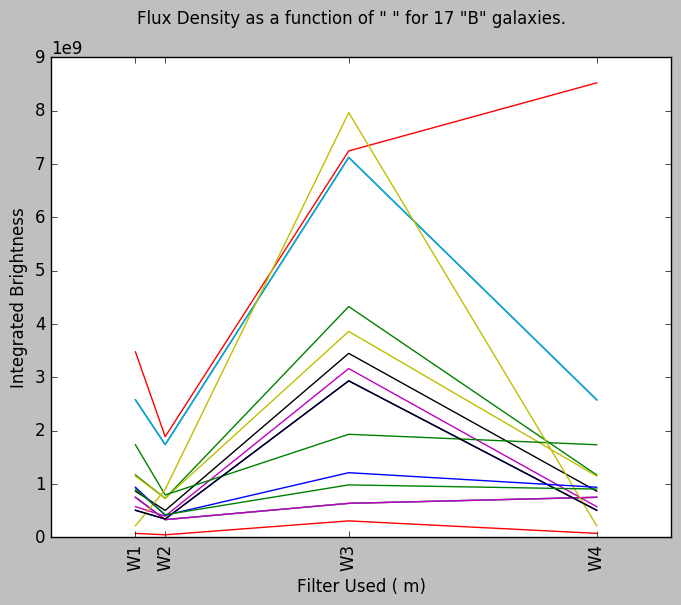

In [149]:
#B galaxies

x= [3.4,4.6,12,22]

GalB1points=[BFilter1FluxPerPixelInLargestAperture[0],BFilter2FluxPerPixelInLargestAperture[0],BFilter3FluxPerPixelInLargestAperture[0],BFilter1FluxPerPixelInLargestAperture[0]]
GalB2points=[BFilter1FluxPerPixelInLargestAperture[1],BFilter2FluxPerPixelInLargestAperture[1],BFilter3FluxPerPixelInLargestAperture[1],BFilter1FluxPerPixelInLargestAperture[1]]
GalB3points=[BFilter1FluxPerPixelInLargestAperture[2],BFilter2FluxPerPixelInLargestAperture[2],BFilter3FluxPerPixelInLargestAperture[2],AFilter1FluxPerPixelInLargestAperture[2]]
GalB4points=[BFilter1FluxPerPixelInLargestAperture[3],BFilter2FluxPerPixelInLargestAperture[3],BFilter3FluxPerPixelInLargestAperture[3],BFilter1FluxPerPixelInLargestAperture[3]]
GalB5points=[BFilter1FluxPerPixelInLargestAperture[4],BFilter2FluxPerPixelInLargestAperture[4],BFilter3FluxPerPixelInLargestAperture[4],BFilter1FluxPerPixelInLargestAperture[4]]
GalB6points=[BFilter1FluxPerPixelInLargestAperture[5],BFilter2FluxPerPixelInLargestAperture[5],BFilter3FluxPerPixelInLargestAperture[5],BFilter1FluxPerPixelInLargestAperture[5]]
GalB7points=[BFilter1FluxPerPixelInLargestAperture[6],BFilter2FluxPerPixelInLargestAperture[6],BFilter3FluxPerPixelInLargestAperture[6],BFilter1FluxPerPixelInLargestAperture[6]]
GalB8points=[BFilter1FluxPerPixelInLargestAperture[7],BFilter2FluxPerPixelInLargestAperture[7],BFilter3FluxPerPixelInLargestAperture[7],BFilter1FluxPerPixelInLargestAperture[7]]
GalB9points=[BFilter1FluxPerPixelInLargestAperture[8],BFilter2FluxPerPixelInLargestAperture[8],BFilter3FluxPerPixelInLargestAperture[8],BFilter1FluxPerPixelInLargestAperture[8]]
GalB10points=[BFilter1FluxPerPixelInLargestAperture[9],BFilter2FluxPerPixelInLargestAperture[9],BFilter3FluxPerPixelInLargestAperture[9],BFilter1FluxPerPixelInLargestAperture[9]]
GalB11points=[BFilter1FluxPerPixelInLargestAperture[10],BFilter2FluxPerPixelInLargestAperture[10],BFilter3FluxPerPixelInLargestAperture[10],BFilter1FluxPerPixelInLargestAperture[10]]
GalB12points=[BFilter1FluxPerPixelInLargestAperture[11],BFilter2FluxPerPixelInLargestAperture[11],BFilter3FluxPerPixelInLargestAperture[11],BFilter1FluxPerPixelInLargestAperture[11]]
GalB13points=[BFilter1FluxPerPixelInLargestAperture[12],BFilter2FluxPerPixelInLargestAperture[12],BFilter3FluxPerPixelInLargestAperture[12],BFilter1FluxPerPixelInLargestAperture[12]]
GalB14points=[BFilter1FluxPerPixelInLargestAperture[13],BFilter2FluxPerPixelInLargestAperture[13],BFilter3FluxPerPixelInLargestAperture[13],BFilter1FluxPerPixelInLargestAperture[13]]
GalB15points=[BFilter1FluxPerPixelInLargestAperture[14],BFilter2FluxPerPixelInLargestAperture[14],BFilter3FluxPerPixelInLargestAperture[14],BFilter1FluxPerPixelInLargestAperture[14]]
GalB16points=[BFilter1FluxPerPixelInLargestAperture[15],BFilter2FluxPerPixelInLargestAperture[15],BFilter3FluxPerPixelInLargestAperture[15],BFilter1FluxPerPixelInLargestAperture[15]]
GalB17points=[BFilter1FluxPerPixelInLargestAperture[16],BFilter2FluxPerPixelInLargestAperture[16],BFilter3FluxPerPixelInLargestAperture[16],BFilter1FluxPerPixelInLargestAperture[16]]


plt.figure(14)
y1 = GalB1points
y2 = GalB2points
y3 = GalB3points
y4 = GalB4points
y5 = GalB5points
y6 = GalB6points
y7 = GalB7points
y8 = GalB8points
y9 = GalB9points
y10 = GalB10points
y11 = GalB11points
y12 = GalB12points
y13 = GalB13points
y14 = GalB14points
y15 = GalB15points
y16 = GalB16points
y17 = GalB17points
x = [3.4, 4.6, 12, 22]

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)

plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()

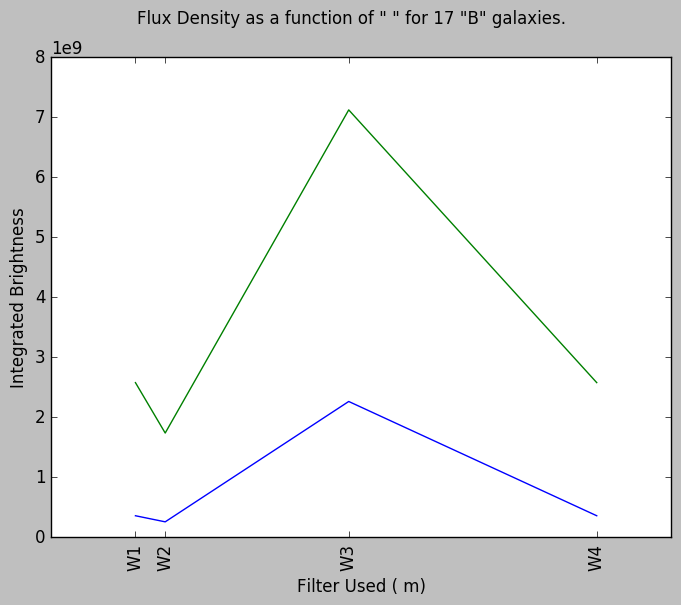

In [150]:
#1 galaxies

plt.figure(15)
y1 = GalA1points
y2 = GalB1points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

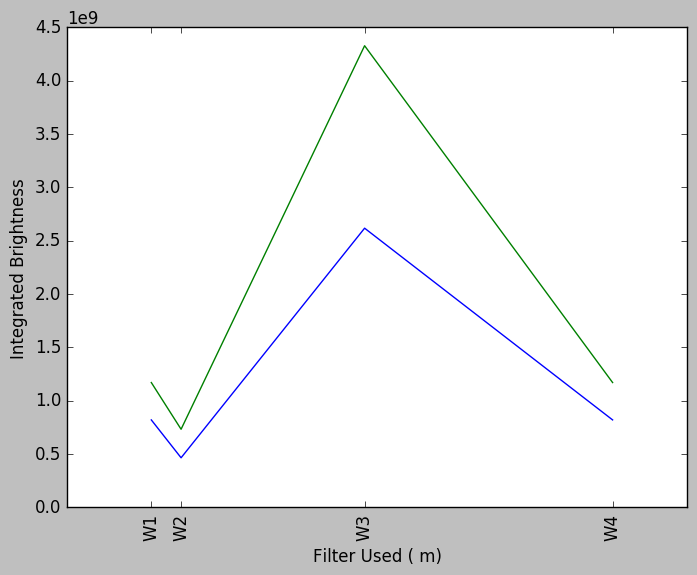

In [151]:
plt.figure(16)
y1 = GalA2points
y2 = GalB2points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

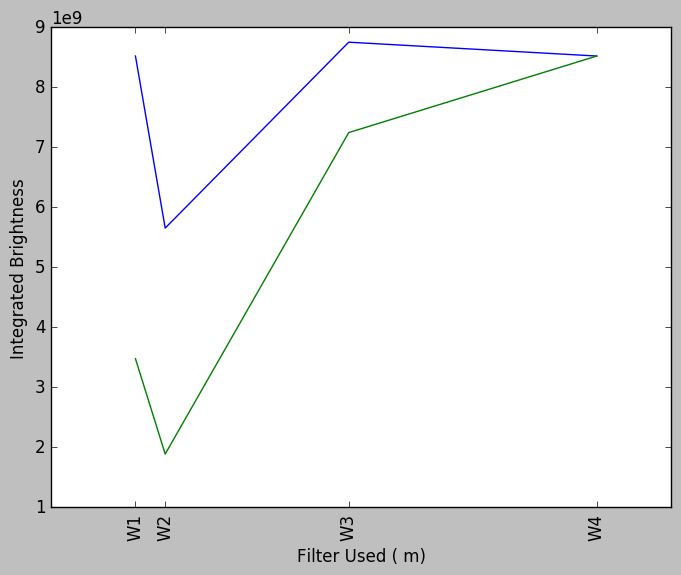

In [152]:
plt.figure(17)
y1 = GalA3points
y2 = GalB3points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

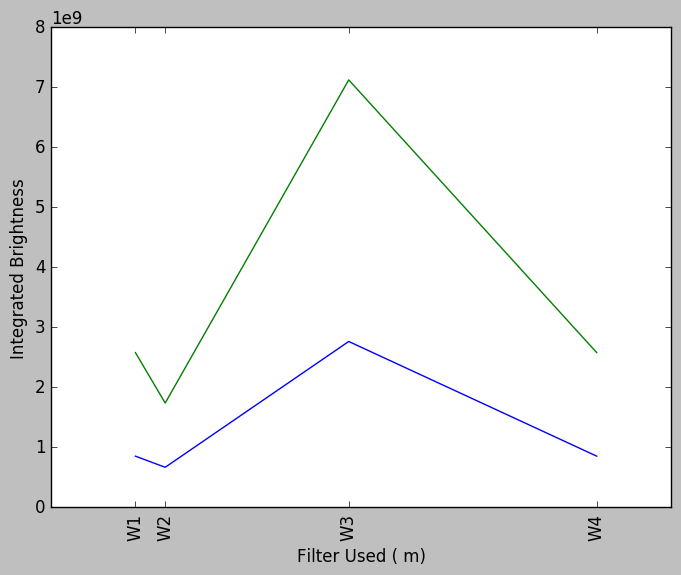

In [153]:
plt.figure(18)
y1 = GalA4points
y2 = GalB4points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

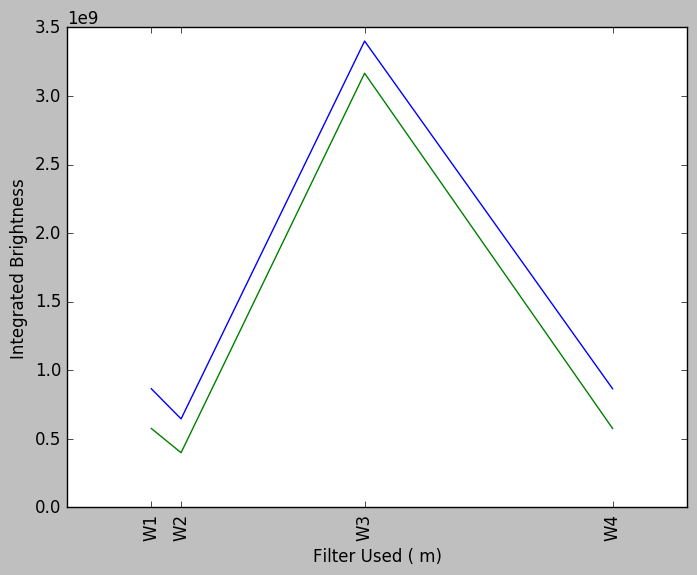

In [154]:
plt.figure(19)
y1 = GalA5points
y2 = GalB5points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

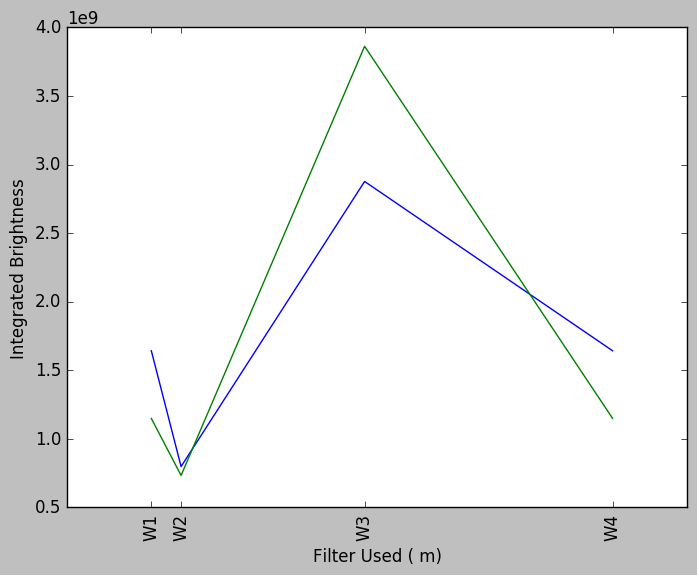

In [155]:
plt.figure(20)
y1 = GalA6points
y2 = GalB6points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

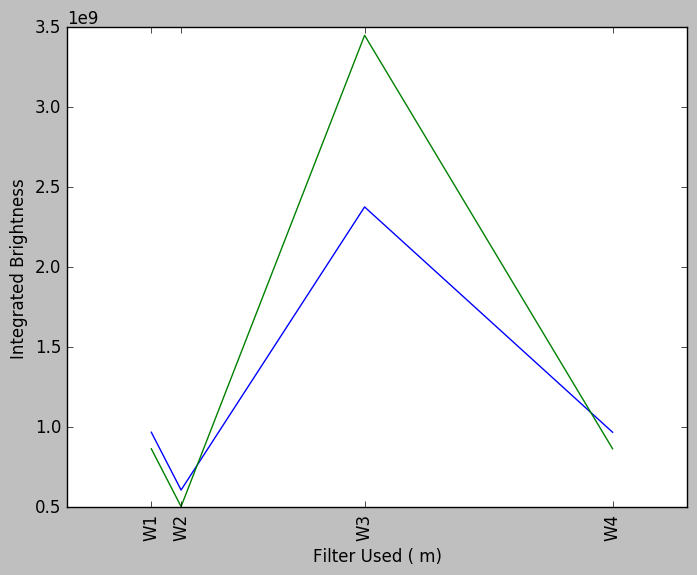

In [156]:
plt.figure(21)
y1 = GalA7points
y2 = GalB7points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

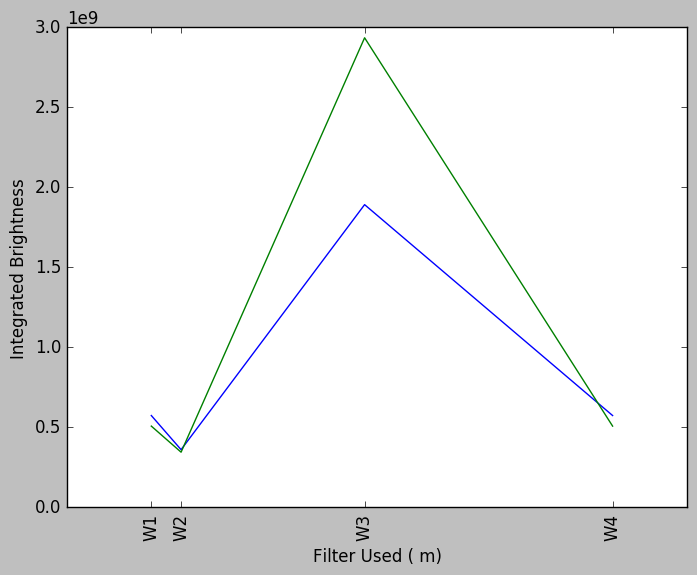

In [157]:
plt.figure(22)
y1 = GalA8points
y2 = GalB8points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

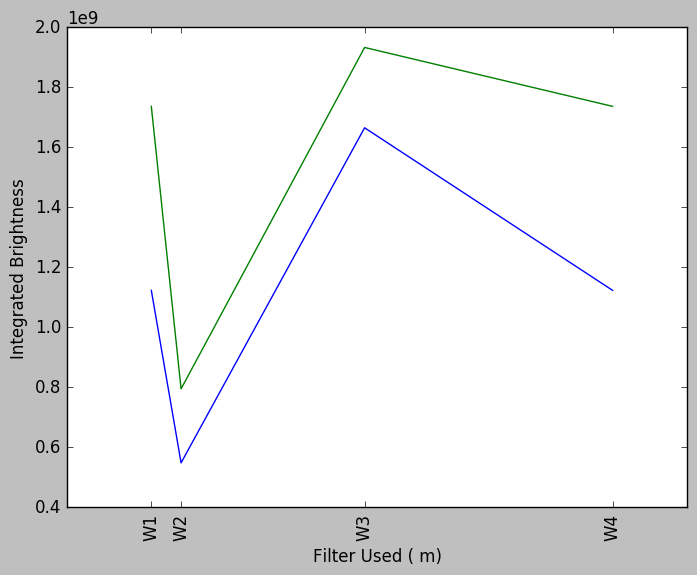

In [158]:
plt.figure(23)
y1 = GalA9points
y2 = GalB9points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

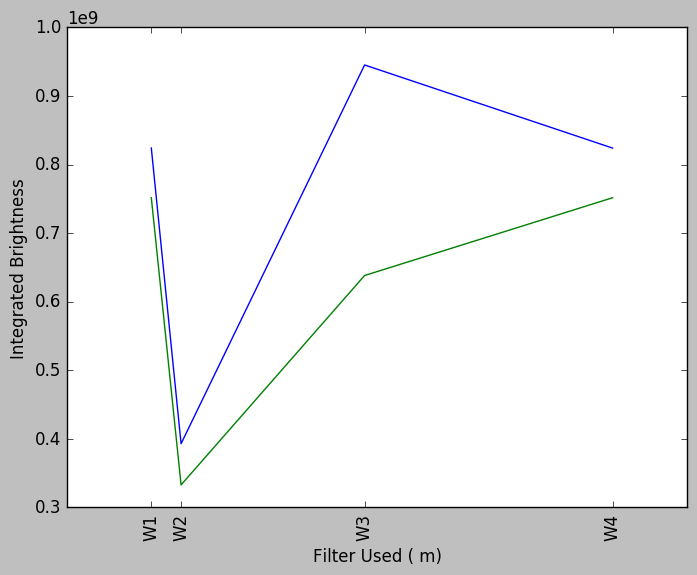

In [159]:
plt.figure(24)
y1 = GalA10points
y2 = GalB10points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

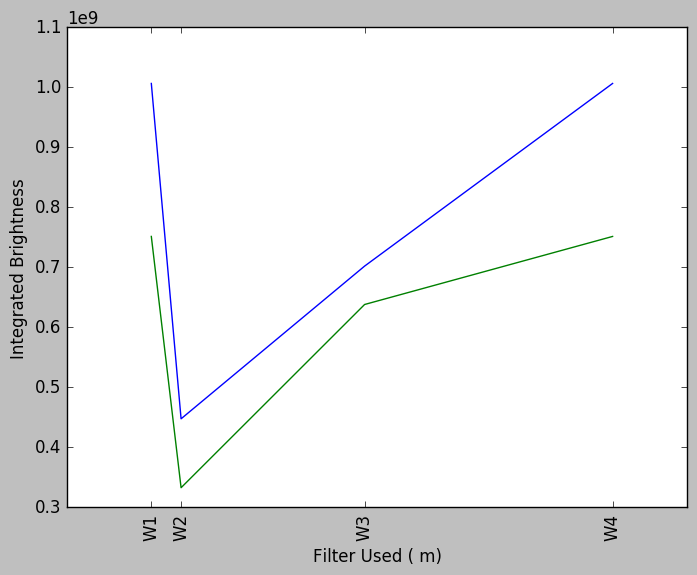

In [160]:
plt.figure(25)
y1 = GalA11points
y2 = GalB11points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

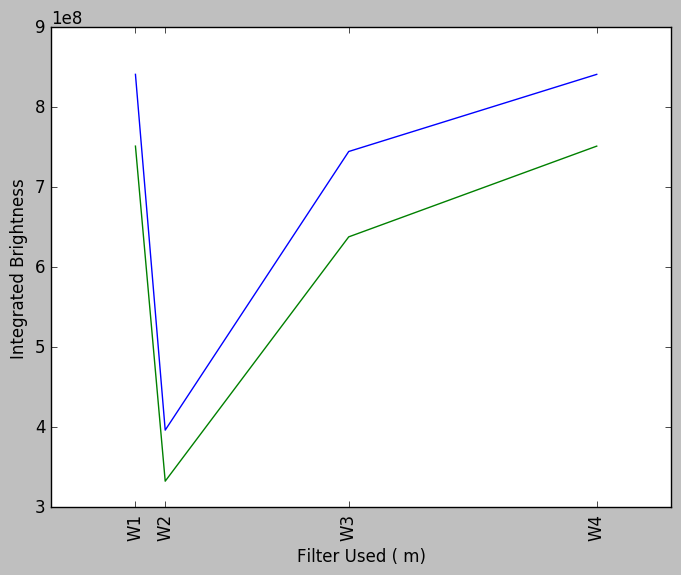

In [161]:
plt.figure(26)
y1 = GalA12points
y2 = GalB12points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

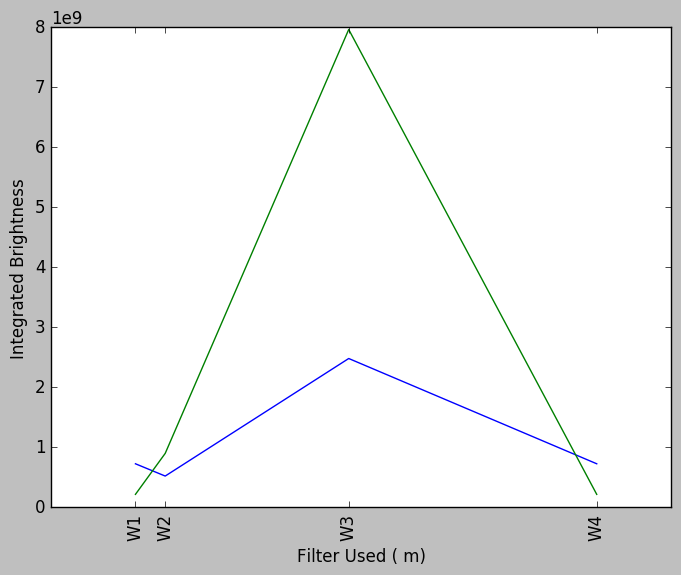

In [162]:
plt.figure(27)
y1 = GalA13points
y2 = GalB13points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

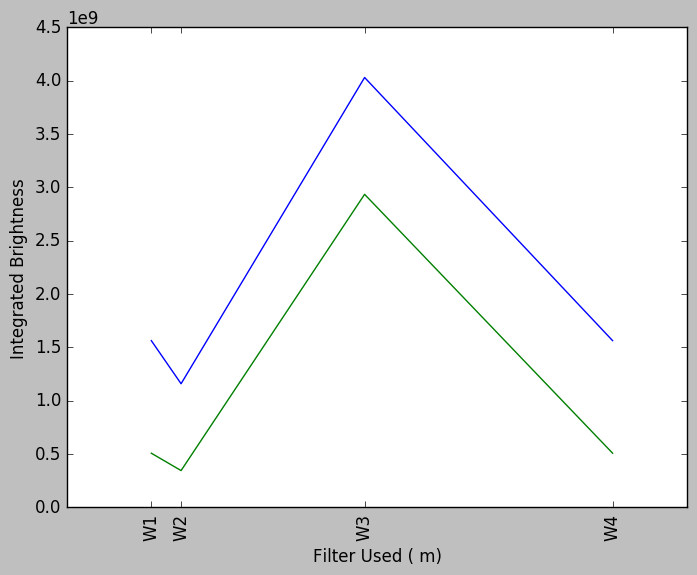

In [163]:
plt.figure(28)
y1 = GalA14points
y2 = GalB14points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

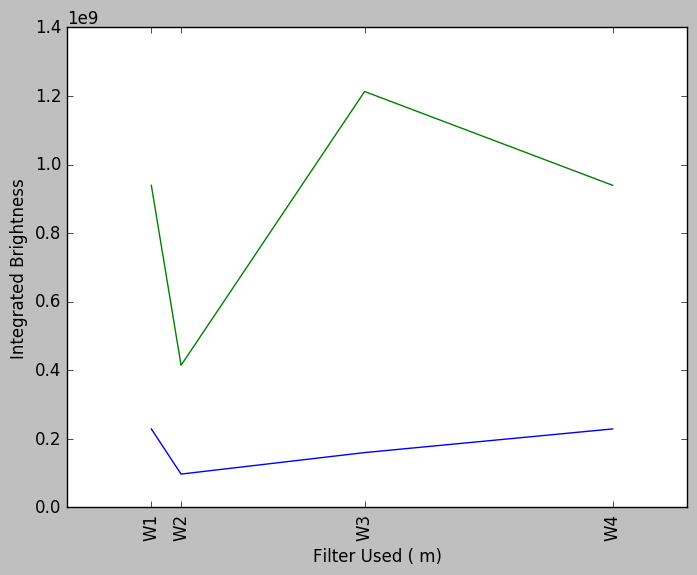

In [164]:
plt.figure(29)
y1 = GalA15points
y2 = GalB15points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

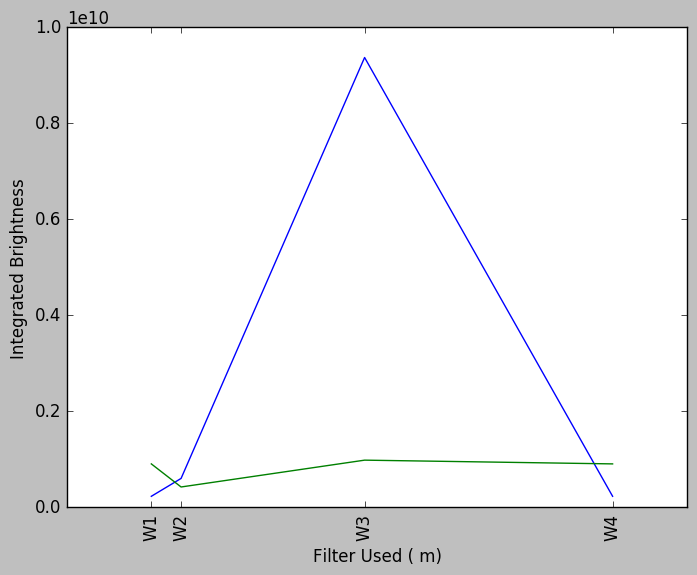

In [165]:
plt.figure(30)
y1 = GalA16points
y2 = GalB16points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()

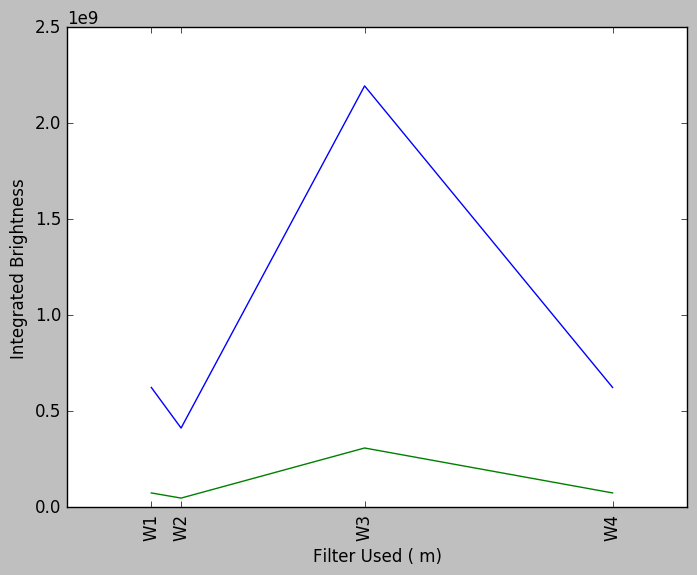

In [166]:
plt.figure(31)
y1 = GalA17points
y2 = GalB17points
x = [3.4, 4.6, 12, 22]
line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
#plt.suptitle('Flux Density as a function of " " for 17 "B" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')
plt.show()